In [1]:
from collections import Counter
from graphviz import Source
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import plotly.plotly as pl
from plotly.graph_objs import Scatter
import pydot
import pymatgen as mg
import re

In [51]:
class Bond_graph_plotter:
    def __init__(self, gml_path, attr='distance'):
        self.G = nx.read_gml(gml_path) # Take in graph information generated previously
        self.node_names = sorted(list(self.G))
        self.attr = attr
        
        edges = self.G.edges()
        self.colors = [float(self.G[u][v][0][self.attr]) for u, v in edges]
        self.pos = {}
        self.get_pos()
    def get_pos(self, xscale=2000, yscale=2200):
        '''
        Generate layout of graph plot
        X position is set such that anion should be in the middle for ternary composition
        Y position is set to evenly divide vertical range
        '''
        elems = [re.split('(\d+)', nodename)[0] for nodename in self.node_names]
        c = Counter(elems)
        enegs = sorted([[key,mg.core.Element(key).X] for key in c.keys()], key=lambda x: x[1])
        enegs = [x[0] for x in enegs]
        enegs[-1], enegs[-2] = enegs[-2], enegs[-1]
        for nodename in self.node_names:
            foo = re.split('(\d+)', nodename)
            elem = foo[0]
            num = int(foo[1])
            y =  yscale - yscale / c[elem] * num + 1/(2 * c[elem]) * (np.random.randint(low=9, high=11)/10)
            x = xscale / len(c.keys()) * enegs.index(elem) * (np.random.randint(low=9, high=11)/10)
            self.pos[nodename] = [x, y]
            self.G.node[nodename]['pos'] = '''"{:.2f},{:.2f}"'''.format(x, y)
    def draw_graph(self, figsize = (16,14), label_edges=False, figname='Ti2N_AntiAnatase'):
        '''
        Draw the bond graph with edges labelled by attribute if desired
        '''
        plt.figure(0,figsize=figsize) 
        nx.draw(self.G, self.pos, node_color='#A0CBE2', edge_color=self.colors,
        width=4, edge_cmap=plt.cm.Reds, with_labels=True)
        if label_edges == True:
            edge_labels = nx.get_edge_attributes(self.G,self.attr)
            d1 = {key:key[0:2] for key in edge_labels.keys()}
            edge_labels = dict((d1[key], '{:.2f}'.format(float(value))) for (key, value) in edge_labels.items())
            nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels, font_size=16)
        plt.savefig("../plots/{}_graph_plt.pdf".format(figname))
        plt.show() 
    def write_pydot(self, filename):
        nx.drawing.nx_pydot.write_dot(self.G, "../plots/{}_graph.dot".format(filename))

In [55]:
# Change filename to your desired structure's filename
filename = 'Nb_R3c'
foo = filename+'_graph.dot'
bar = filename+'_graph.pdf'
gp = Bond_graph_plotter("../data/{}_graph.gml".format(filename), attr='label')
gp.get_pos(xscale=1000, yscale=1000)
gp.write_pydot(filename)

In [56]:
!neato -n2 -Tpdf -Gdpi=200 -Nfontname=Arial -Efontname=Arial ../plots/$foo > ../plots/$bar

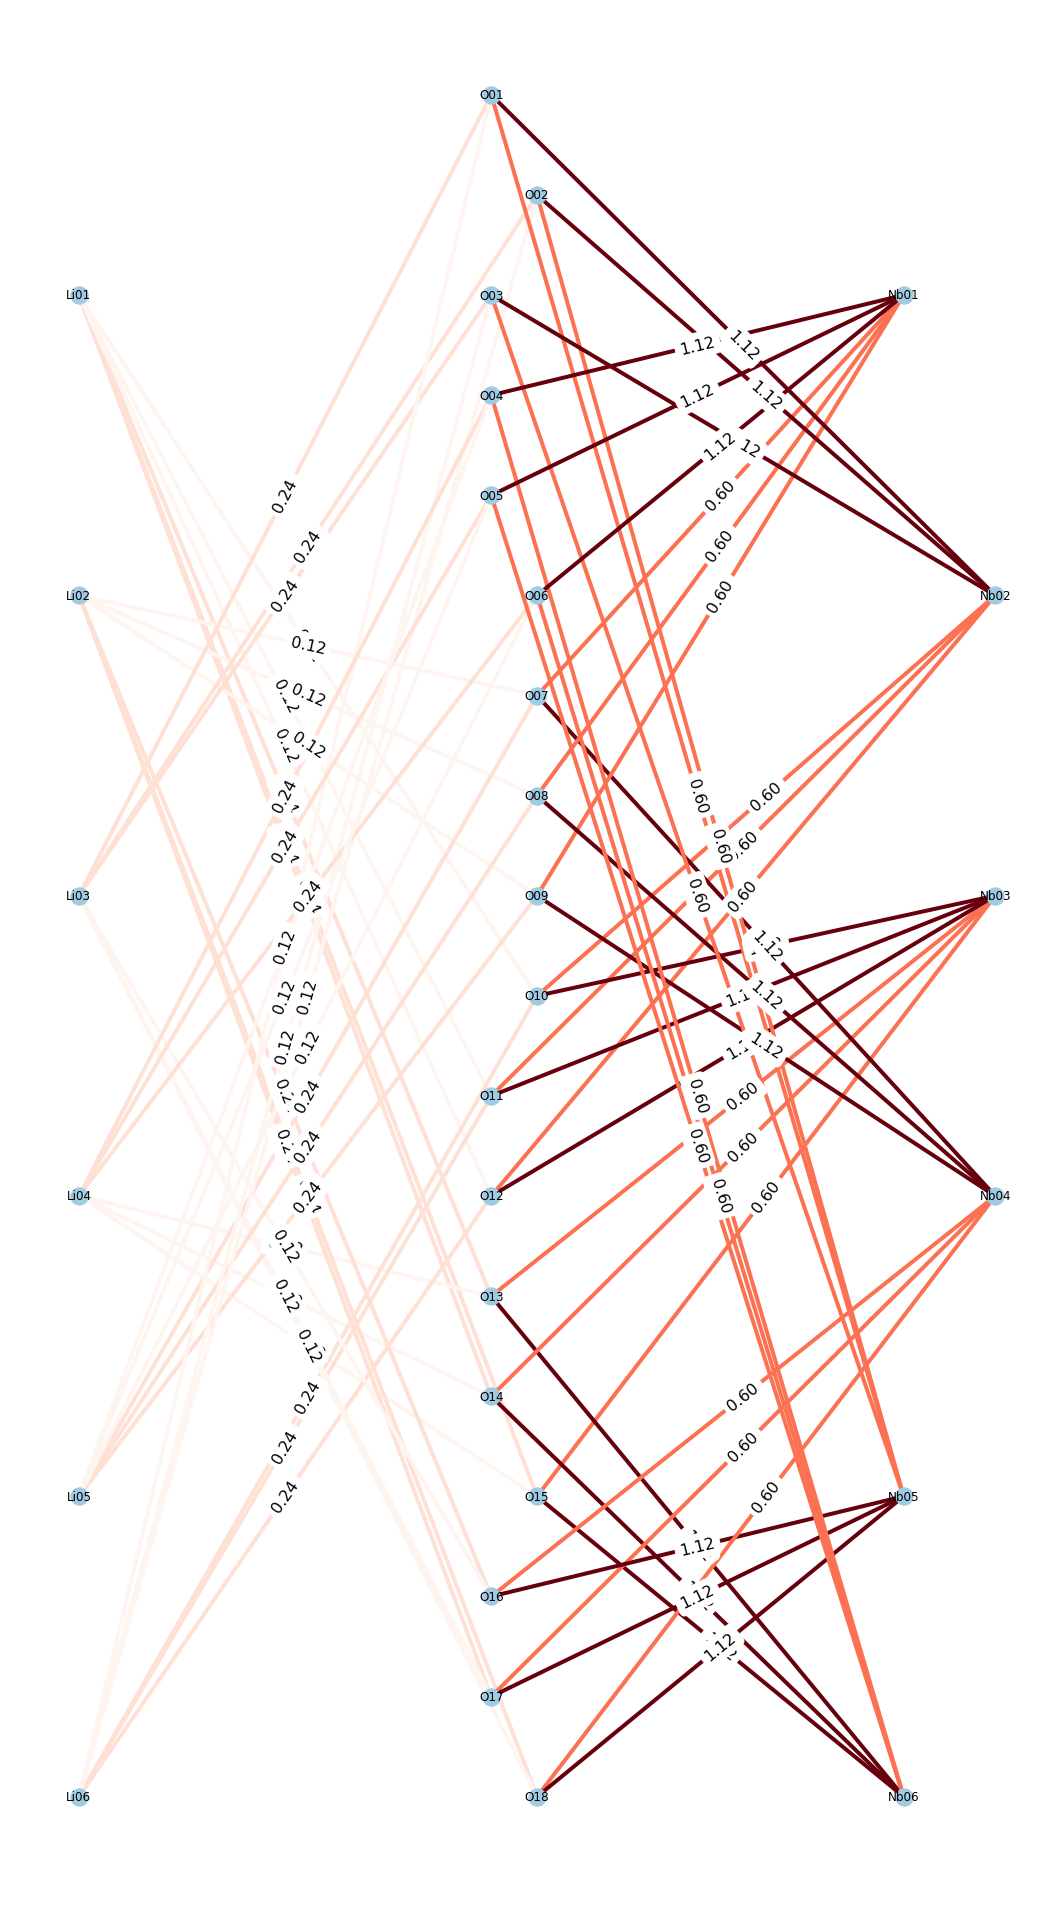

In [57]:
gp = Bond_graph_plotter("../data/{}_graph.gml".format(filename), attr='label')
gp.get_pos(xscale=1000, yscale=1000)
gp.draw_graph(label_edges=True, figsize=(14, 26), figname=filename)
